In [1]:
import random
import math
import io
import cairocffi as cairo
from scipy.ndimage import imread
from matplotlib.image import imsave
from scipy.misc import imresize
import matplotlib.pyplot as plt
import numpy as np
import unicodedata
import hangul
%matplotlib inline

f = open("data/k1001.txt")
ko_chset = f.read().splitlines()
print("loaded %d characters" % len(ko_chset))

en_chset = []
en_chset.extend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
en_chset.extend(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",\
              "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"])
en_chset.extend(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N",\
              "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])
en_chset.extend(["(", ")", "'", "\"", ".", ",", ":", ";", "!", "?", "/", "@", "#", "$",\
              "%", "^", "&", "*", "[", "]", "{", "}", "<", ">", "~", "-"])

all_chset = ko_chset + en_chset

def get_random_ch(chset=all_chset):
    return chset[random.randrange(0,len(chset))]

loaded 2350 characters


In [2]:
WIDTH, HEIGHT = 120, 120
surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
ctx = cairo.Context (surface)
ctx.set_font_size(40)

def get_text_width(text):
    extent = ctx.text_extents(text)
    xbearing, ybearing, width, height, xadvance, yadvance = extent
    return width

# Generate 3 X 3 matrix
def generate_mat(target, font, weight="NORMAL"):
    if weight == "BOLD":
        weight = cairo.FONT_WEIGHT_BOLD
    else:
        weight = cairo.FONT_WEIGHT_NORMAL
        
    left_blank = random.choice([True, False])
    right_blank = random.choice([True, False])
    
    ctx.set_source_rgb(1, 1, 1)
    ctx.paint()
    ctx.set_source_rgb(0, 0, 0)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
            weight)
    ctx.move_to(0, 34)
    ctx.show_text(get_random_ch())
    ctx.move_to(40, 34)
    ctx.show_text(get_random_ch())
    ctx.move_to(80, 34)
    ctx.show_text(get_random_ch())
    
    offset = (38 - get_text_width(target))/2
    
    if offset > 12:
        offset = 12
        
    if left_blank:
        ctx.move_to(-10 + offset, 74)
    else:
        ctx.move_to(2 + offset, 74)
    ctx.show_text(get_random_ch())
    ctx.move_to(40 + offset, 74)
    ctx.show_text(target)
    if right_blank:
        ctx.move_to(90 - offset, 74)
    else:
        ctx.move_to(78 - offset, 74)
    ctx.show_text(get_random_ch())
    
    
    ctx.move_to(0, 114)
    ctx.show_text(get_random_ch())
    ctx.move_to(40, 114)
    ctx.show_text(get_random_ch())
    ctx.move_to(80, 114)
    ctx.show_text(get_random_ch())

    f = io.BytesIO()
    surface.write_to_png (f)
    mat = imread(f)
    return mat

# Slice a target character from 3 X 3 matrix
def slice_img(mat):
    x_offset = random.randrange(-3, 3)
    y_offset = random.randrange(-3, 3)
    scale_factor = random.randrange(42, 48)
    x_start = round(60 - scale_factor / 2) + x_offset
    x_end = round(60 + scale_factor / 2) + x_offset
    y_start = round(60 - scale_factor / 2) + y_offset
    y_end = round(60 + scale_factor / 2) + y_offset
    sliced = mat[y_start:y_end, x_start:x_end]
    return imresize(sliced, [32, 32, 3])

# Helper function to draw 3 X 3 plots
def draw_subplot(array, w, h):
    plt.figure(num=None, figsize=(3, 3), facecolor='w', edgecolor='k')
    for i in range(len(array)):
        plt.subplot(w,h,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(array[i], interpolation='none')

print ("function loaded")

function loaded


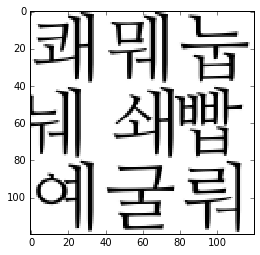

In [3]:
mat1 = generate_mat(get_random_ch(),"NanumMyeongjo", "NORMAL")

plt.figure()
plt.imshow(mat1, interpolation='none')

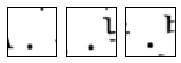

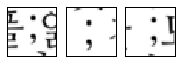

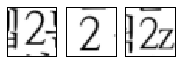

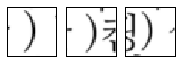

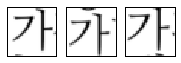

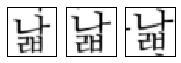

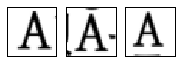

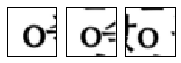

In [4]:
sliced = [slice_img(generate_mat(".","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat(";","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("2","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat(")","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("가","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("낣","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("A","NanumMyeongjo", "BOLD")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("o","NanumMyeongjo", "BOLD")) for i in range(3)]
draw_subplot(sliced, 1, 3)

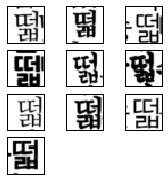

In [5]:
import itertools
import json

fonts = ["NanumMyeongjo", "NanumGothic", "Gungsuh", "Batang", "Dotum"]
weights = ["NORMAL", "BOLD"]


def show_example(ch, fonts, weights):
    sliced = []
    for font, weight in itertools.product(fonts, weights):
        sliced.append(slice_img(generate_mat(ch, font, weight)))
    draw_subplot(sliced, math.ceil(len(sliced)/3), 3)
    
show_example("떫", fonts, weights)

In [16]:
import tarfile
import os
base_path = "data/en/"
index_data = []
index_path = []

for ch, font, weight in itertools.product(en_chset, fonts, weights):
    # Gungsuh bold is corrupted
    if font == "Gungsuh" and weight == "BOLD":
        continue
    for i in range(100):
        pathname = "%07d.png" % len(index_data)
        fullpath = base_path + pathname
        imsave(fullpath, slice_img(generate_mat(ch, font, weight)))
        index_data.append({'path': pathname, 'font': font, 'weight': weight, 'target': ch})
        index_path.append(pathname)
        if len(index_data) % 1000 == 0:
            print ("saving %07dth data...\r" % len(index_data))
            
with tarfile.open(base_path+"data.tar", "w") as tar:
    print ("saving into tar file...")
    for name in index_path:
        tar.add(base_path+name, name)
        os.remove(base_path+name)
    tar.close()
    

with open('data/en/index.json', 'w') as outfile:
    print ("saving index json...")
    json.dump(index_data, outfile, indent=4, sort_keys=True, separators=(',', ':'))
    
print ("done")

saving 0001000th data...
saving 0002000th data...
saving 0003000th data...
saving 0004000th data...
saving 0005000th data...
saving 0006000th data...
saving 0007000th data...
saving 0008000th data...
saving 0009000th data...
saving 0010000th data...
saving 0011000th data...
saving 0012000th data...
saving 0013000th data...
saving 0014000th data...
saving 0015000th data...
saving 0016000th data...
saving 0017000th data...
saving 0018000th data...
saving 0019000th data...
saving 0020000th data...
saving 0021000th data...
saving 0022000th data...
saving 0023000th data...
saving 0024000th data...
saving 0025000th data...
saving 0026000th data...
saving 0027000th data...
saving 0028000th data...
saving 0029000th data...
saving 0030000th data...
saving 0031000th data...
saving 0032000th data...
saving 0033000th data...
saving 0034000th data...
saving 0035000th data...
saving 0036000th data...
saving 0037000th data...
saving 0038000th data...
saving 0039000th data...
saving 0040000th data...
